In [34]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from common import NWSL, Fonts, Colors, add_signature

In [2]:
# Inclusive age range for the middle group
prime = (25, 27)

# Read in the data and perform preprocessing

In [3]:
# Read in the data
df = pd.read_csv("data/nwsl_minutes.csv", index_col=[0, 1])
idx = df.index.names
df

15     16  17    18      19      20      21      22      23  \
team year                                                                   
BAY  2024    NaN    NaN NaN   NaN  1109.0   238.0     2.0    14.0  2098.0   
BOS  2016    NaN    NaN NaN   NaN     NaN     NaN   100.0  1464.0  3273.0   
     2017    NaN    NaN NaN   NaN     NaN     NaN  1559.0  1626.0  4395.0   
CHI  2016    NaN    NaN NaN   NaN     NaN     NaN     NaN  1648.0  6799.0   
     2017    NaN    NaN NaN   NaN     NaN     NaN   134.0   327.0  2772.0   
...          ...    ...  ..   ...     ...     ...     ...     ...     ...   
WAS  2021    NaN    NaN NaN  87.0  1639.0     NaN   657.0  3653.0  1076.0   
     2022    NaN    NaN NaN   NaN   270.0  1234.0     NaN   300.0  6404.0   
     2023  150.0  426.0 NaN   NaN     NaN   624.0  1011.0  1731.0  1965.0   
     2024    NaN   36.0 NaN   NaN     NaN     NaN  2607.0  2333.0  4427.0   
WNY  2016    NaN    NaN NaN   NaN     NaN    45.0  1388.0  4582.0  6445.0   

               24  ...      33     34  35  36  37  38  39  40     41  42  
team year          ...                                                    
BAY  2024  2802.0  ...   214.0    NaN NaN NaN NaN NaN NaN NaN    NaN NaN  
BOS  2016  4420.0  ...     NaN    NaN NaN NaN NaN NaN NaN NaN    NaN NaN  
     2017  5899.0  ...   804.0    NaN NaN NaN NaN NaN NaN NaN    NaN NaN  
CHI  2016  3092.0  ...     NaN    NaN NaN NaN NaN NaN NaN NaN    NaN NaN  
     2017  6915.0  ...     NaN    NaN NaN NaN NaN NaN NaN NaN    NaN NaN  
...           ...  ...     ...    ...  ..  ..  ..  ..  ..  ..    ...  ..  
WAS  2021  3558.0  ...   653.0    NaN NaN NaN NaN NaN NaN NaN    NaN NaN  
     2022   708.0  ...   195.0  180.0 NaN NaN NaN NaN NaN NaN    NaN NaN  
     2023  4182.0  ...    19.0    NaN NaN NaN NaN NaN NaN NaN  181.0 NaN  
     2024  1881.0  ...  1226.0  455.0 NaN NaN NaN NaN NaN NaN    NaN NaN  
WNY  2016  2216.0  ...     NaN    NaN NaN NaN NaN NaN NaN NaN    NaN NaN  

[86 rows x 28 columns]

# Add columns summing up ranges

In [8]:
# Calculate what proportion of the whole each value is
rates = df.div(df.sum(axis=1), axis=0)
rates

15        16  17        18        19        20        21  \
team year                                                                   
BAY  2024       NaN       NaN NaN       NaN  0.042198  0.009056  0.000076   
BOS  2016       NaN       NaN NaN       NaN       NaN       NaN  0.005051   
     2017       NaN       NaN NaN       NaN       NaN       NaN  0.065617   
CHI  2016       NaN       NaN NaN       NaN       NaN       NaN       NaN   
     2017       NaN       NaN NaN       NaN       NaN       NaN  0.005640   
...             ...       ...  ..       ...       ...       ...       ...   
WAS  2021       NaN       NaN NaN  0.004017  0.075683       NaN  0.030338   
     2022       NaN       NaN NaN       NaN  0.012397  0.056657       NaN   
     2023  0.006796  0.019300 NaN       NaN       NaN  0.028271  0.045805   
     2024       NaN  0.001399 NaN       NaN       NaN       NaN  0.101298   
WNY  2016       NaN       NaN NaN       NaN       NaN  0.002273  0.070105   

                 22        23        24  ...        33        34  35  36  37  \
team year                                ...                                   
BAY  2024  0.000533  0.079830  0.106617  ...  0.008143       NaN NaN NaN NaN   
BOS  2016  0.073947  0.165320  0.223255  ...       NaN       NaN NaN NaN NaN   
     2017  0.068437  0.184983  0.248285  ...  0.033840       NaN NaN NaN NaN   
CHI  2016  0.083232  0.343384  0.156162  ...       NaN       NaN NaN NaN NaN   
     2017  0.013763  0.116672  0.291048  ...       NaN       NaN NaN NaN NaN   
...             ...       ...       ...  ...       ...       ...  ..  ..  ..   
WAS  2021  0.168683  0.049686  0.164296  ...  0.030153       NaN NaN NaN NaN   
     2022  0.013774  0.294031  0.032507  ...  0.008953  0.008264 NaN NaN NaN   
     2023  0.078425  0.089027  0.189471  ...  0.000861       NaN NaN NaN NaN   
     2024  0.090651  0.172016  0.073088  ...  0.047638  0.017680 NaN NaN NaN   
WNY  2016  0.231426  0.325521  0.111925  ...       NaN       NaN NaN NaN NaN   

           38  39  40      41  42  
team year                          
BAY  2024 NaN NaN NaN     NaN NaN  
BOS  2016 NaN NaN NaN     NaN NaN  
     2017 NaN NaN NaN     NaN NaN  
CHI  2016 NaN NaN NaN     NaN NaN  
     2017 NaN NaN NaN     NaN NaN  
...        ..  ..  ..     ...  ..  
WAS  2021 NaN NaN NaN     NaN NaN  
     2022 NaN NaN NaN     NaN NaN  
     2023 NaN NaN NaN  0.0082 NaN  
     2024 NaN NaN NaN     NaN NaN  
WNY  2016 NaN NaN NaN     NaN NaN  

[86 rows x 28 columns]

In [9]:
# These are inclusive ranges
ranges = [(15, prime[0] - 1), (prime[0], prime[1]), (prime[1] + 1, 41)]
for (low, high) in ranges:
    rates[str(low) + "-" + str(high)] = rates[list(map(str, range(low, high + 1)))].sum(
        axis=1
    )
rates

15        16  17        18        19        20        21  \
team year                                                                   
BAY  2024       NaN       NaN NaN       NaN  0.042198  0.009056  0.000076   
BOS  2016       NaN       NaN NaN       NaN       NaN       NaN  0.005051   
     2017       NaN       NaN NaN       NaN       NaN       NaN  0.065617   
CHI  2016       NaN       NaN NaN       NaN       NaN       NaN       NaN   
     2017       NaN       NaN NaN       NaN       NaN       NaN  0.005640   
...             ...       ...  ..       ...       ...       ...       ...   
WAS  2021       NaN       NaN NaN  0.004017  0.075683       NaN  0.030338   
     2022       NaN       NaN NaN       NaN  0.012397  0.056657       NaN   
     2023  0.006796  0.019300 NaN       NaN       NaN  0.028271  0.045805   
     2024       NaN  0.001399 NaN       NaN       NaN       NaN  0.101298   
WNY  2016       NaN       NaN NaN       NaN       NaN  0.002273  0.070105   

                 22        23        24  ...  36  37  38  39  40      41  42  \
team year                                ...                                   
BAY  2024  0.000533  0.079830  0.106617  ... NaN NaN NaN NaN NaN     NaN NaN   
BOS  2016  0.073947  0.165320  0.223255  ... NaN NaN NaN NaN NaN     NaN NaN   
     2017  0.068437  0.184983  0.248285  ... NaN NaN NaN NaN NaN     NaN NaN   
CHI  2016  0.083232  0.343384  0.156162  ... NaN NaN NaN NaN NaN     NaN NaN   
     2017  0.013763  0.116672  0.291048  ... NaN NaN NaN NaN NaN     NaN NaN   
...             ...       ...       ...  ...  ..  ..  ..  ..  ..     ...  ..   
WAS  2021  0.168683  0.049686  0.164296  ... NaN NaN NaN NaN NaN     NaN NaN   
     2022  0.013774  0.294031  0.032507  ... NaN NaN NaN NaN NaN     NaN NaN   
     2023  0.078425  0.089027  0.189471  ... NaN NaN NaN NaN NaN  0.0082 NaN   
     2024  0.090651  0.172016  0.073088  ... NaN NaN NaN NaN NaN     NaN NaN   
WNY  2016  0.231426  0.325521  0.111925  ... NaN NaN NaN NaN NaN     NaN NaN   

              15-24     25-27     28-41  
team year                                
BAY  2024  0.238309  0.369240  0.392451  
BOS  2016  0.467572  0.377058  0.155369  
     2017  0.567322  0.170883  0.261796  
CHI  2016  0.582778  0.362677  0.054545  
     2017  0.427122  0.366009  0.206869  
...             ...       ...       ...  
WAS  2021  0.492704  0.265608  0.241688  
     2022  0.409366  0.348255  0.242378  
     2023  0.457095  0.305319  0.237586  
     2024  0.438452  0.117967  0.443581  
WNY  2016  0.741250  0.088186  0.170564  

[86 rows x 31 columns]

# Visualize the plots

In [21]:
# Three colors for the lines
under_label = "15-" + str(prime[0] - 1)
prime_label = str(prime[0]) + "-" + str(prime[1])
over_label = str(prime[1] + 1) + "-41"
metrics = [
    (under_label, "#2ca02c"),
    (prime_label, "#1f77b4"),
    (over_label, "#9467bd"),
]
metrics_dict = dict(metrics)

# Team names
labels = {
    "ORL": "Orlando Pride",
    "WAS": "Washington Spirit",
    "GFC": "NJ/NY Gotham",
    "KCC": "Kansas City Current",
    "NC": "North Carolina Courage",
    "POR": "Portland Thorns",
    "BAY": "Bay FC",
    "CHI": "Chicago Red Stars",
    "LOU": "Racing Louisville",
    "SD": "San Diego Wave",
    "UTA": "Utah Royals",
    "LA": "Angel City",
    "RGN": "Seattle Reign",
    "HOU": "Houston Dash",
}

# Current season
season = df.index.map(lambda x: x[1]).max()

<Figure size 1728x972 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

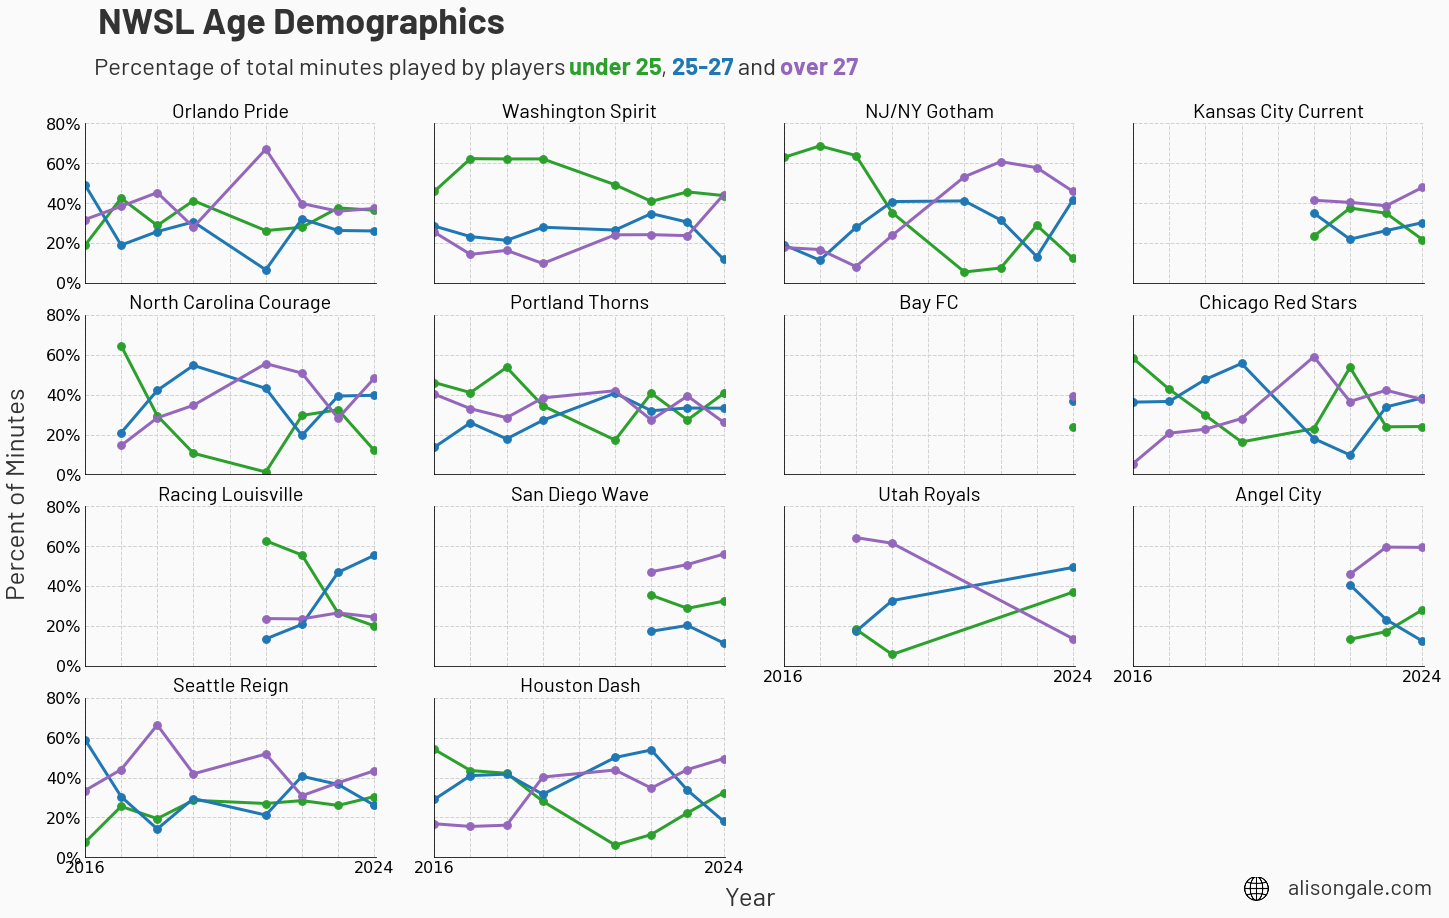

In [36]:
# General setup
plt.clf()
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor=Colors.WHITE)
fig, axs = plt.subplots(4, 4)
fig.patch.set_facecolor(Colors.WHITE)

for i, team in enumerate(labels.keys()):
    ax = axs[int(i / 4), i % 4]
    ax.set_facecolor(Colors.WHITE)

    # Set title
    ax.set_title(labels[team], fontproperties=Fonts.BARLOW, size=20)

    # Handle axes and ticks
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.set_ylim([0, 0.8])
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
    ax.tick_params(axis="both", which="both", length=0, labelsize=16)
    if i % 4 != 0:
        ax.yaxis.set_ticklabels([])
        ax.yaxis.set_ticks_position("none")

    ax.set_xlim([2016, season + 0.05])
    ax.set_xticks([2016, season])
    ax.set_xticks(range(2016, season + 1), minor=True)

    if (int(i / 4) == 2 and i % 4 >= 2) or (int(i / 4) == 3 and i % 4 < 2):
        ax.xaxis.set_ticklabels([2016, season])
    else:
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position("none")

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add gridlines
    ax.set_axisbelow(True)
    ax.grid(which="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)

    # Plot the data
    for (metric, color) in metrics:
        ax.plot(rates.loc[team].index, rates.loc[team][metric], color, lw=3)
        # Scatter is necessary when teams only appear in one year
        ax.scatter(rates.loc[team].index, rates.loc[team][metric], c=color, s=60)

# Clear empty plots
for i in range(len(labels.keys()), len(axs) * len(axs[0])):
    ax = axs[int(i / 4), i % 4]
    ax.set_axis_off()

fig.supxlabel(
    "Year", x=0.51, y=0.07, fontproperties=Fonts.BARLOW, size=26, color=Colors.BLACK
)
fig.supylabel(
    "Percent of Minutes",
    x=0.08,
    fontproperties=Fonts.BARLOW,
    size=26,
    color=Colors.BLACK,
)

plt.suptitle(
    "NWSL Age Demographics",
    x=0.25,
    y=1.0,
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=36,
    color=Colors.BLACK,
)
fig_y = 0.93
x_off = -0.07
plt.figtext(
    x_off + 0.2,
    fig_y,
    "Percentage of total minutes played by players",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=Colors.BLACK,
)
plt.figtext(
    x_off + 0.475,
    fig_y,
    "under " + str(prime[0]),
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=24,
    color=metrics_dict[under_label],
)
plt.figtext(
    x_off + 0.528,
    fig_y,
    ",",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=Colors.BLACK,
)
plt.figtext(
    x_off + 0.535,
    fig_y,
    str(prime[0]) + "-" + str(prime[1]),
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=24,
    color=metrics_dict[prime_label],
)
plt.figtext(
    x_off + 0.57,
    fig_y,
    " and",
    fontproperties=Fonts.BARLOW,
    fontsize=24,
    color=Colors.BLACK,
)
plt.figtext(
    x_off + 0.597,
    fig_y,
    "over " + str(prime[1]),
    fontproperties=Fonts.BARLOW_BOLD,
    fontsize=24,
    color=metrics_dict[over_label],
)

add_signature(fig, x=0.79, y=0.08, fs=22, w=0.025)

# Save image
plt.savefig(
    "images/"
    + str(season)
    + "_age_demographics"
    + str(prime[0])
    + "_"
    + str(prime[1])
    + ".png",
    bbox_inches="tight",
    pad_inches=0.5,
)